In [ ]:
#Developed by Prof. Valerio Bozza, University of Salerno, Italy
import os, glob
import numpy as np
import ccdproc
import matplotlib
import matplotlib.pyplot as plt
from astropy.nddata import CCDData 

In [2]:
rawimagespath='/home/astro/Documenti/2023/ELLIP_GALAXY/m105/*.FIT'
darkpath='/home/astro/Documenti/2023/ELLIP_GALAXY/bias/*.FIT'
masterflatfile='/home/astro/Documenti/2023/ELLIP_GALAXY/masterflatR.FIT'
reducedpath='/home/astro/Documenti/2023/ELLIP_GALAXY/ReducedImgs/'

In [3]:
darkfiles=glob.glob(darkpath)
darkfiles.sort()
print(darkfiles)

['/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000001.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000002.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000003.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000004.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000005.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000006.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000007.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000008.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000009.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000010.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000011.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000012.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000013.BIAS.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/bias/bias.00000014.BIAS.FIT', '/hom

In [4]:
rawfiles=glob.glob(rawimagespath)
rawfiles.sort()
print(rawfiles)

['/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000001.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000002.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000003.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000004.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000005.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000006.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000007.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000008.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000009.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000010.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000011.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000012.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000013.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000014.FIT', '/home/astro/Documenti/2023/ELLIP_GALAXY/m105/m105r.00000015.

In [5]:
darks=[CCDData.read(dark,unit='adu') for dark in darkfiles]

In [6]:
combiner=ccdproc.Combiner(darks)

In [7]:
masterdark=combiner.median_combine()

In [8]:
imagedark=combiner.median_combine().to_hdu()[0]
imagedark.scale('uint16')
masterdark=CCDData(imagedark.data, unit='adu')

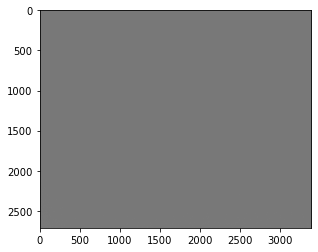

In [9]:
plt.imshow(masterdark.data,norm=matplotlib.colors.Normalize(500,2500,True),
              cmap='gray')

In [10]:
masterflat=CCDData.read(masterflatfile,unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [11]:
if not os.path.exists(reducedpath):
    os.mkdir(reducedpath)

In [12]:
it = 0
for rawfile in rawfiles:
    print(it)
    it += 1
    raw=CCDData.read(rawfile,unit='adu')
    reduced=ccdproc.ccd_process(raw,master_bias=masterdark, master_flat=masterflat)
    for i in range(1,len(reduced.data)-1):
        for j in range(1,len(reduced.data[0])-1):
            if reduced.data[i,j] <0:
                reduced.data[i,j]=0#(np.sum(reduced.data[i-1:i+1,j-1:j+1])-reduced.data[i,j])/8
    reduced.data=reduced.data.astype('uint16')
    reduced.write(reducedpath + os.path.basename(rawfile),overwrite=True)

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


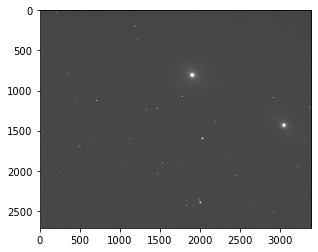

In [13]:
plt.imshow(reduced.data,norm=matplotlib.colors.Normalize(0,500,True),
              cmap='gray')

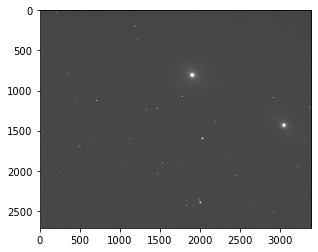

In [14]:
plt.imshow(reduced.data,norm=matplotlib.colors.Normalize(0,500,True),
              cmap='gray')